In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
noise = np.random.rand(len(x_data))

In [5]:
noise

array([0.76794565, 0.56246086, 0.61149922, ..., 0.31671621, 0.24415608,
       0.25274877])

y = mx + b

b =5

In [6]:
y_true = (0.5*x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data = x_data,columns=['x data'])

In [8]:
y_df = pd.DataFrame(data = y_true,columns=['y'])

In [9]:
my_data = pd.concat([x_df,y_df],axis = 1)
my_data.head()

,x data,y
0,0.00000,5.767946
1,0.00001,5.562466
2,0.00002,5.611509
3,0.00003,5.494843
4,0.00004,5.036275


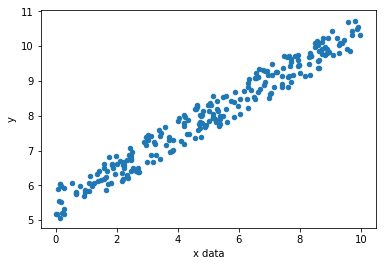

In [10]:
my_data.sample(n=250).plot(kind='scatter',x='x data',y='y')
plt.show()

In [11]:
batch_size = 8

In [12]:
np.random.rand(2)

array([0.21913709, 0.09300344])

In [13]:
m = tf.Variable(0.88)
b = tf.Variable(0.50)

In [14]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [16]:
y_model = m * xph + b

In [17]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [19]:
train = optimizer.minimize(error)

In [20]:
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    
    sess.run(init)
    
    nr_batches = 10000
    
    
    for i in range(nr_batches):
        
        rand_indx = np.random.randint(len(x_data) ,size= batch_size)
        
        feed_dict = {xph:x_data[rand_indx],yph:y_true[rand_indx]}
        
        sess.run(train,feed_dict=feed_dict)
    
    model_m,model_b = sess.run([m,b])
        
  
    

In [30]:
print(model_m)
print('\n')
print(model_b)

0.5036262


5.4998555


In [32]:
y_hat = model_m * x_data + model_b

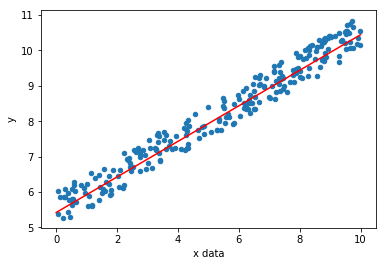

In [27]:
my_data.sample(n=250).plot(kind='scatter',x='x data',y = 'y')
plt.plot(x_data,y_hat,'r')

In [25]:
y_hat.size

1000000

# TF ESTIMATOR

In [36]:
feat_col = [tf.feature_column.numeric_column('x',shape=[1])]

In [37]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\AI\\AppData\\Local\\Temp\\tmp8eucre2z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001ACAA955AC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [40]:
input_fun = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [41]:
train_input_fun = tf.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [42]:
test_input_fun = tf.estimator.inputs.numpy_input_fn({'x':X_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [43]:
estimator.train(input_fn=input_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\AI\AppData\Local\Temp\tmp8eucre2z\model.ckpt.
INFO:tensorflow:loss = 479.37573, step = 1
INFO:tensorflow:global_step/sec: 889.157
INFO:tensorflow:loss = 21.157238, step = 101 (0.128 sec)
INFO:tensorflow:global_step/sec: 918.195
INFO:tensorflow:loss = 21.984097, step = 201 (0.093 sec)
INFO:tensorflow:global_step/sec: 908.784
INFO:tensorflow:loss = 7.540842, step = 301 (0.112 sec)
INFO:tensorflow:global_step/sec: 833.841
INFO:tensorflow:loss = 7.1624727, step = 401 (0.120 sec)
INFO:tensorflow:global_step/sec: 806.955
INFO:tensorflow:loss = 2.7242894, step = 501 (0.125 sec)
INFO:tensorflow:global_step/sec: 806.943
INFO:tensorflow:loss = 8.824173, step = 601 (0.124 sec)
INFO:tensorflow:global_step/sec: 

In [44]:
train_metrics = estimator.evaluate(input_fn=train_input_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-21-05:24:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\AI\AppData\Local\Temp\tmp8eucre2z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-21-05:24:53
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.21567777, global_step = 1000, label/mean = 8.003951, loss = 1.7254221, prediction/mean = 7.8605294
INFO:tensorflow:Saving 'checkpoint_path' 

In [45]:
test_metrics = estimator.evaluate(input_fn=test_input_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-21-05:25:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\AI\AppData\Local\Temp\tmp8eucre2z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-21-05:25:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.21333393, global_step = 1000, label/mean = 7.982599, loss = 1.7066715, prediction/mean = 7.8383765
INFO:tensorflow:Saving 'checkpoint_path' 

In [46]:
print(train_metrics)

{'average_loss': 0.21567777, 'label/mean': 8.003951, 'loss': 1.7254221, 'prediction/mean': 7.8605294, 'global_step': 1000}


In [47]:
print(test_metrics)

{'average_loss': 0.21333393, 'label/mean': 7.982599, 'loss': 1.7066715, 'prediction/mean': 7.8383765, 'global_step': 1000}


In [48]:
brand_new_data = np.linspace(0,10,10)

In [49]:

input_fu_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [50]:
list(estimator.predict(input_fn=input_fu_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\AI\AppData\Local\Temp\tmp8eucre2z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.7929516], dtype=float32)},
 {'predictions': array([5.4743295], dtype=float32)},
 {'predictions': array([6.1557074], dtype=float32)},
 {'predictions': array([6.837085], dtype=float32)},
 {'predictions': array([7.518463], dtype=float32)},
 {'predictions': array([8.199841], dtype=float32)},
 {'predictions': array([8.881218], dtype=float32)},
 {'predictions': array([9.562595], dtype=float32)},
 {'predictions': array([10.243975], dtype=float32)},
 {'predictions': array([10.925352], dtype=float32)}]

In [52]:
predictions =[]

for pred in estimator.predict(input_fn=input_fu_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\AI\AppData\Local\Temp\tmp8eucre2z\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [54]:
predictions


[array([4.7929516], dtype=float32),
 array([5.4743295], dtype=float32),
 array([6.1557074], dtype=float32),
 array([6.837085], dtype=float32),
 array([7.518463], dtype=float32),
 array([8.199841], dtype=float32),
 array([8.881218], dtype=float32),
 array([9.562595], dtype=float32),
 array([10.243975], dtype=float32),
 array([10.925352], dtype=float32)]

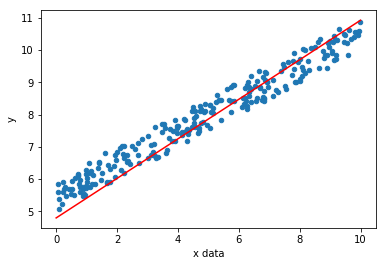

In [59]:
my_data.sample(n=250).plot(kind='scatter',x='x data',y='y')
plt.plot(brand_new_data,predictions,"r")

plt.show()